In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import json
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
king_county = pd.read_csv('./data/EXTR_RPSale.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_KC = pd.DataFrame(king_county)

In [5]:
df_KC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044082 entries, 0 to 2044081
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 374.3+ MB


,Crime,Zone,Industry,Charles_River,Nitric_Oxides,Rooms,Age,Employment_Distance,Highway_Access,Tax_10k,Pupil_Teacher_Ratio,B,Lower_Status_Percentage
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
df.isna().sum()

Crime                      0
Zone                       0
Industry                   0
Charles_River              0
Nitric_Oxides              0
Rooms                      0
Age                        0
Employment_Distance        0
Highway_Access             0
Tax_10k                    0
Pupil_Teacher_Ratio        0
B                          0
Lower_Status_Percentage    0
dtype: int64

In [13]:
for column in df.columns:
    print(df.corr()[column].sort_values(ascending = False))

Crime                      1.000000
Highway_Access             0.625505
Tax_10k                    0.582764
Lower_Status_Percentage    0.455621
Nitric_Oxides              0.420972
Industry                   0.406583
Age                        0.352734
Pupil_Teacher_Ratio        0.289946
Charles_River             -0.055892
Zone                      -0.200469
Rooms                     -0.219247
Employment_Distance       -0.379670
B                         -0.385064
Name: Crime, dtype: float64
Zone                       1.000000
Employment_Distance        0.664408
Rooms                      0.311991
B                          0.175520
Charles_River             -0.042697
Crime                     -0.200469
Highway_Access            -0.311948
Tax_10k                   -0.314563
Pupil_Teacher_Ratio       -0.391679
Lower_Status_Percentage   -0.412995
Nitric_Oxides             -0.516604
Industry                  -0.533828
Age                       -0.569537
Name: Zone, dtype: float64
Industry 

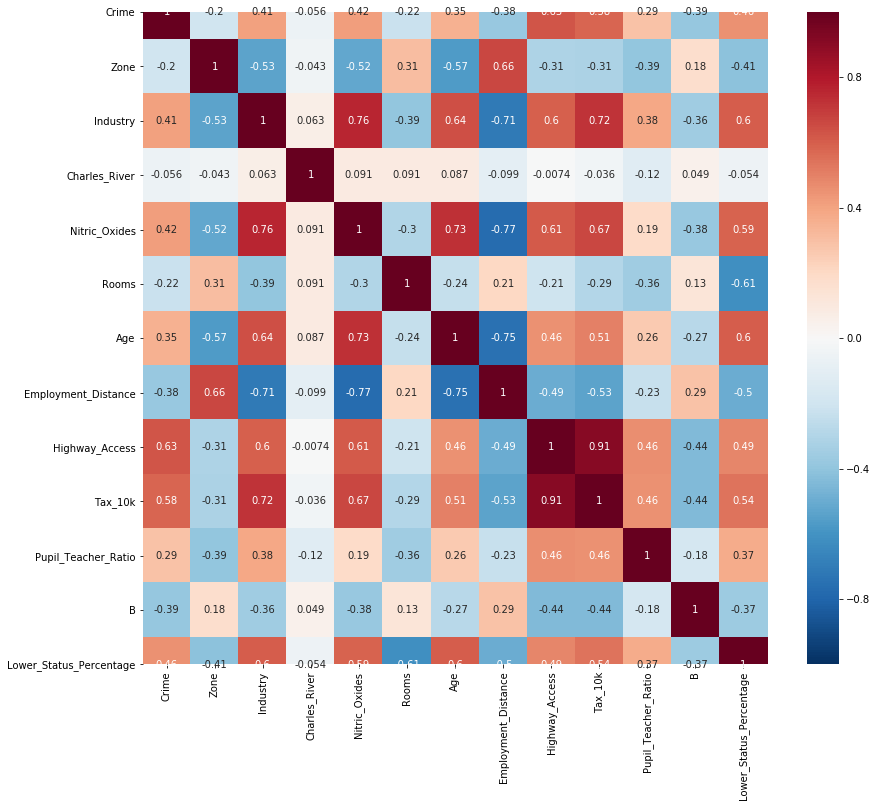

In [20]:
correlation = df.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")